# 
# Transformation Matrixes
## Application to image transformation
In this exercise, you will have to define several transformation matrixes and apply them to images. In the process, you will be able to use 2D grayscale and 2D multichannel images. There are slight differences between both types of images, but essentially the process will be the same.

First of all, as we are going to use 2D images, we will use 2x2 transformation matrixes.
1. Design matrixes which are able to convert the image in these ways:
 - set upside down
 - flip as seen in a mirror
 - rotate 90º to the left (anti-clockwise rotation)
 - rotate 90º to the right (clockwise rotation)
2. Ensure that your matrixes are adecuate for those transformations by hand; apply them to vectors \begin{bmatrix}1\\0\end{bmatrix} and \begin{bmatrix}0\\1\end{bmatrix}, and draw them to verify they are transformed accordingly.
3. Read the Python code below and understand it before beginning to change it.
 - We are going to use publicly available general purpose images from _skimage_ module, but you don't need the module itself (images have been downloaded and you will find them in the folder _transformation_images_)
 - You will find gaps to fill marked as _# TO DEFINE:_ and tips of what we expect you to do
 - You will also find the four transformation matrixes set to the identity matrix \begin{bmatrix}1&&0\\0&&1\end{bmatrix}
 - There is a list of (checked) available images commented, and a short list to be use in your trials.
4. Add one by one your transformations and apply them to a single image.
 - We recommend you use the horse image, as it is a grayscale image and it is lighter
5. Once you have checked all the transformations, add the astronaut and the coffee images.
 - These images are heavier, so they will take longer to be processed.
6. If you have time, try a new transformation, which can be a composition of two or more of the previously defined.
7. You can also try with new images.

We also welcome your contributions to the code!


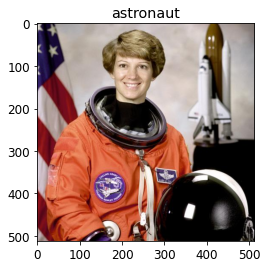

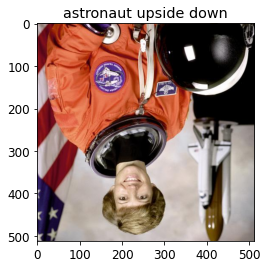

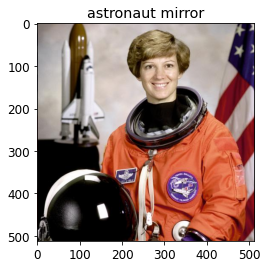

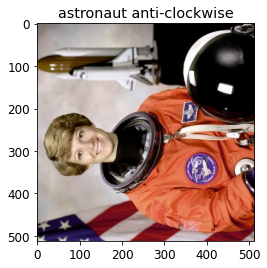

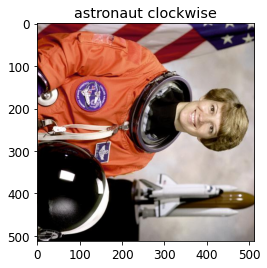

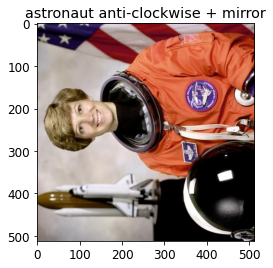

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from pathlib import Path

# You can use this is if scikit-image module is available:
#import skimage
#from skimage import data # module scikit-image to use the images available
cwd = os.getcwd()
#----------------------------------------------#
def plot_img(img,name=""):
    '''
        img: the image to be plotted
        name: the name of the image (by default empty)
    '''
    matplotlib.rcParams['font.size'] = 12 # Size of the name and numbers on the plot
    plt.figure()
    plt.title(name)
    if img.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray) # grayscale
    else:
        plt.imshow(img) # multichannel
    plt.show()

#----------------------------------------------#
def adjust(img):
    # the shape method gives the length of each dimension, being 0=Height, 1=Width, 2=Depth/Channels 
    # only the shape in rotations might need to be adjusted (H<->W), if the height and width are different
    # you can use the *transpose* method, interchanging the values of the positions.
    # example: input img.shape: (400,600,3) img.transpose(2,1,0).shape -> (3,600,400)
    # if it is grayscale, only 2 values in shape: (400,600) img.transpose(1,0).shape -> (600,400)

    if img.ndim == 2:
        img_adjusted = img.transpose(1,0).shape # TO DEFINE: assign the adjusted shape for grayscale
    else:
        img_adjusted = img.transpose(1,0,2).shape # TO DEFINE: assign the adjusted shape for multichannel
    return img_adjusted

#----------------------------------------------#
def keep(img):
    return img.shape # No change needed

#----------------------------------------------#
def transf_shape(img, transf):
    '''
        img: image to be transformed
        transf: transformation name ('UD','MI','AC','CL')
        return: shape of the transformed image. Only need to change shape (H<->W) in rotations
        Options: keep(img) returns the same shape  / adjust(img) returns the shape with H/W interchanged
    '''
    
    switcher={
        'UD' : keep(img), # TO DEFINE: keep or adjust
        'MI' : keep(img), # TO DEFINE: keep or adjust
        'AC' : adjust(img), # TO DEFINE: keep or adjust
        'CL' : adjust(img),  # TO DEFINE: keep or adjust
        'UDCL':adjust(img),
        'CLUD': adjust(img),
        'ACMI': adjust(img)
    }
    return switcher.get(transf,"Invalid transformation")

#----------------------------------------------#
def apply_transformation(T, img, img_tr_shape):
    '''
        T: 2x2 matrix. Gives the transformation of coordinates
        img: original img
        img_tr_shape: the shape of the final image. In the case of rotations of non-square images, must be adjusted.
    '''
    
    # Create an empty image with the adjusted shape
    img_transformed = np.empty(img_tr_shape, dtype=np.uint8)
    
    # For each pixel, calculate its new position by applying the transformation matrix and inserting it on its new place
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            # Get the pixel in the original position (i,j)
            if img.ndim == 2:
                pixel_data = img[i, j]    # only 2 dimensions
            else:
                pixel_data = img[i, j, :] # three dimensions, but only height and width are necessary
            input_coords = np.array([i, j])
            
            # Obtain the new position for the pixel (i_out,j_out)
            i_out, j_out =T@input_coords 
            
            # Insert the pixel in its new position
            if img.ndim == 2:
                img_transformed[i_out, j_out] = pixel_data 
            else:
                img_transformed[i_out, j_out, :] = pixel_data
    
    return img_transformed

#----------------------------------------------#

# Define four transformations (they are initially set to identity):

# UD = upside down
T_UD = [
    [-1,0],
    [0,1]]

# MI = mirror
T_MI = [
    [1,0],
    [0,-1]]

# AC = anti-clockwise rotation
T_AC = [
    [0,-1],
    [1,0]]

# CL = clockwise rotation
T_CL = [
    [0,1],
    [-1,0]]


#ACMI = anti-clockwise + mirror
T_ACMI = np.matmul(T_AC, T_MI)

# These are the images available at skimage:
images = ('astronaut',
          #'binary_blobs',
          #'brick',
          #'colorwheel',
          #'camera',
          #'checkerboard',
          #'clock',
          #'coffee',
          #'coins',
          #'grass',
          #'gravel',
          #'horse',
          #'logo',
          #'page',
          #'text',
          #'rocket',
          )


# Begin trying with the following three. 
# Until you have checked all the transformation, use only the horse image (keep the other two commented), as it is lighter

#images = ('horse',
          #'astronaut',
          #'coffee'
          #)

# Once you are confident, test using the three images.
# Select a new image and apply all the transfomations again.


for name in images:
    
    my_file = Path(cwd+'/transformation_images/'+name+'.jpg')
    try:
        my_file.is_file()
        img = plt.imread(cwd+'/transformation_images/'+name+'.jpg')
    except OSError:
        print(cwd+'/transformation_images/'+name+'.jpg not found')
        raise

    # Show the original image with its name
    plot_img(img,name)
        
    # Upside-down transformation
    img_transformed = apply_transformation(T_UD, img, transf_shape(img,'UD'))
    plot_img(img_transformed,name + " upside down")
    
    # TO DEFINE: Do the same for all the transformations
    # Mirror transformation
    img_transformed = apply_transformation(T_MI, img, transf_shape(img,'MI'))
    plot_img(img_transformed,name + " mirror")
    
    # Anti-clockwise transformation
    img_transformed = apply_transformation(T_AC, img, transf_shape(img,'AC'))
    plot_img(img_transformed,name + " anti-clockwise")
    
    # Clockwise transformation
    img_transformed = apply_transformation(T_CL, img, transf_shape(img,'CL'))
    plot_img(img_transformed,name + " clockwise")
    
    # Another transformation combination of the previous:
    
    # Anti-clockwise + Mirror transformation
    img_transformed = apply_transformation(T_ACMI, img, transf_shape(img,'ACMI'))
    plot_img(img_transformed,name + " anti-clockwise + mirror")
    